In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('letter-recognition.data',sep=",")

In [5]:
X=df.iloc[:,1:17]
Y=df.select_dtypes(include=[object])

In [6]:
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=0.20,random_state=10)

In [7]:
scaler=StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train=scaler.transform(X_train)
X_validation=scaler.transform(X_validation)

In [10]:
mlp=MLPClassifier(hidden_layer_sizes=(250,300),max_iter=1000000,activation='logistic')

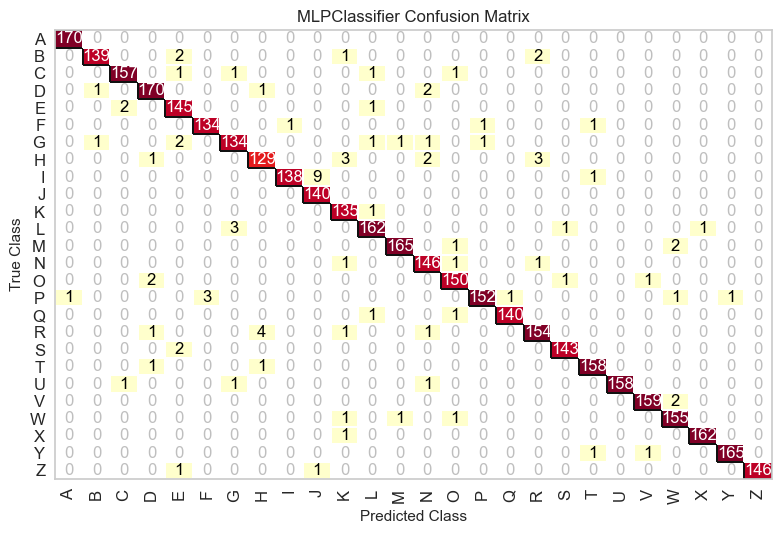

In [11]:
from yellowbrick.classifier import confusion_matrix
cm=confusion_matrix(mlp,X_train,Y_train.values.ravel(),X_validation,Y_validation.values.ravel(),classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [12]:
cm.fit(X_train,Y_train.values.ravel())

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x13d83d310>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [13]:
cm.score(X_validation,Y_validation)

/Users/sarashaikh/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9765

In [14]:
pred=cm.predict(X_validation)
pred

array(['C', 'I', 'H', ..., 'R', 'B', 'W'], dtype='<U1')

In [15]:
print('Accuracy:',accuracy_score(Y_validation,pred))

Accuracy: 0.9765
